In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50) 
import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 显示中文
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r"c:\windows\fonts\simhei.ttf", size=14)

In [2]:
data=pd.read_excel('模型数据/2018年数据20200803.xlsx')
data.head()

,就诊时间,年龄,性别,分诊科室,分诊等级,分诊去向,分诊时间,到诊时间,抢救上床时间,体温类型,体温,脉搏,收缩压,舒张压,呼吸,SpO2,微量血糖,疼痛评分,GCS评分,PHI评分,来诊主诉,主诉,现病史,既病史,药物过敏史,诊断,处理意见,注意事项,时长,没有时长的主诉,时长（统一数字）_1,编码,分诊,到诊,时间差,分诊-年,分诊-月,分诊-日,分诊-时,分诊-分,分诊-秒,候诊/分钟
0,2017-12-31 23:59:00,59.0,男,急诊外科,2,医疗室,2018-01-01 00:01:00,2018-01-01 01:37:00,,耳温,37.0,51.00,181.000,59.00,19.3,99.0,0.0,43289,15,0,腰痛伴呕吐3小时余,腰背部疼痛3小时,腰背部疼痛3小时，进食后出现腰背痛，伴恶心呕吐，活动可,高血压病,否认,腰痛查因,治疗 静脉采血成组(含一次性采血针) 检验 血常规五分类(末梢...,注意休息，如有不适，请及时就诊。,['3小时余'],腰痛伴呕吐,['3时'],"[60315, 70101, 0, 0]",2018-01-01 00:01:00,2018-01-01 01:37:00,0.066667,2018,1,1,0,1,0,96
1,2018-01-01 00:14:00,41.0,男,急诊内科,4,医疗室,2018-01-01 00:20:00,2018-01-01 08:15:00,,耳温,37.0,100.00,128.000,85.00,20.0,98.0,0.0,,15,0,咽部不适,,,,,,,,[],咽部不适,[''],"[60105, 0, 0, 0]",2018-01-01 00:20:00,2018-01-01 08:15:00,0.329861,2018,1,1,0,20,0,475
2,2018-01-01 00:19:00,59.0,女,急诊内科,3,医疗室,2018-01-01 00:24:00,2018-01-01 02:42:00,2018-01-01 03:05:00,耳温,36.0,74.00,168.000,85.00,20.0,99.0,0.0,,15,0,自诉咽痛鼻塞声嘶7天伴胸部不适1小时,心悸、胸闷3小时,患者于3小时因心悸、胸闷，无胸痛，伴头晕，耳鸣，无伴呕吐，无伴咳嗽、咳痰，无发热，无排黑便。,无“高血压”有“糖尿病”。,未发现,胸闷查因,处方 0.9%氯化钠注射液 1袋 250ML IVD 每日一次 ...,II级护理;测BP P SpO2 q2H；留陪人;,"['7天', '1小时']",自诉咽痛鼻塞声嘶伴胸部不适,['1时'],"[100104, 30303, 100105, 60105]",2018-01-01 00:24:00,2018-01-01 02:42:00,0.095833,2018,1,1,0,24,0,138
3,2018-01-01 00:30:00,1.0,女,急诊儿科,3,医疗室,2018-01-01 00:32:00,2018-01-01 01:41:00,,耳温,38.9,89.96,138.404,81.03,19.3,0.0,0.0,,15,0,发热半天,,,,,,,,['半天'],发热,['半天'],"[110121, 0, 0, 0]",2018-01-01 00:32:00,2018-01-01 01:41:00,0.047917,2018,1,1,0,32,0,69
4,2018-01-01 00:33:00,14.0,男,急诊儿科,3,医疗室,2018-01-01 00:34:00,2018-01-01 01:44:00,,耳温,39.0,89.96,138.404,81.03,19.3,0.0,0.0,,15,0,发热伴出水痘1天,,,,,,,,['1天'],发热伴出水痘,['1天'],"[90130, 110121, 0, 0]",2018-01-01 00:34:00,2018-01-01 01:44:00,0.048611,2018,1,1,0,34,0,70


In [3]:
data[data['年龄']==' ']

F:\Anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,就诊时间,年龄,性别,分诊科室,分诊等级,分诊去向,分诊时间,到诊时间,抢救上床时间,体温类型,体温,脉搏,收缩压,舒张压,呼吸,SpO2,微量血糖,疼痛评分,GCS评分,PHI评分,来诊主诉,主诉,现病史,既病史,药物过敏史,诊断,处理意见,注意事项,时长,没有时长的主诉,时长（统一数字）_1,编码,分诊,到诊,时间差,分诊-年,分诊-月,分诊-日,分诊-时,分诊-分,分诊-秒,候诊/分钟


In [4]:
##大于14岁的为成人
# def need(x):
#     a=False
#     if 'M' in x:
#         a=True  
#     return a
# data[data['年龄'].apply(lambda x:need(x))]

In [24]:
xingbie=[]
labels=data['性别'].unique()
for i in data['性别'].unique():
    xingbie.append(len(data[data['性别']==i]))
xingbie

[63586, 65059]

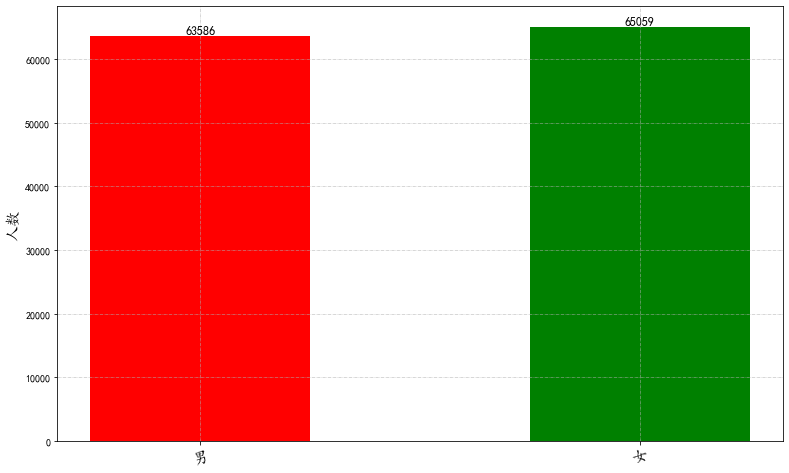

In [33]:
fig = plt.figure(figsize=(13, 8))
plt.bar(labels, xingbie,color=['r','g','b', 'c', 'm', 'y'],width=0.5)
for a,b in zip(labels,xingbie):
    plt.text(a, b-0.3,'%.0f'%b, ha = 'center',va = 'bottom',fontsize=12)
plt.setp(plt.gca().get_xticklabels(), rotation=15, horizontalalignment='center')#x轴字体旋转23度
plt.xticks(fontsize=16)#设置刻度字体大小
plt.grid(True,axis='both',linestyle='-.', linewidth=0.5)
# plt.xlabel("温度",fontdict={'fontsize': 16})
plt.ylabel("人数",fontdict={'fontsize': 16})
# plt.savefig('')
plt.show()

In [5]:
for i in data['年龄'].unique():
    print(i,len(data[data['年龄']==i]))

59.0 1182
41.0 880
1.0 4910
14.0 816
2.0 4169
13.0 823
18.0 1426
7.0 2044
71.0 922
35.0 1599
34.0 1587
74.0 705
48.0 1078
86.0 591
43.0 889
4.0 4072
8.0 1824
51.0 1000
45.0 1059
55.0 1508
5.0 2866
29.0 2306
81.0 930
42.0 920
28.0 2327
27.0 2290
62.0 1367
40.0 1032
10.0 1312
76.0 802
32.0 1975
36.0 1578
25.0 2329
26.0 2209
21.0 1466
31.0 2060
80.0 963
63.0 1363
16.0 852
57.0 1074
79.0 858
91.0 239
30.0 2288
64.0 1395
49.0 1092
11.0 1171
69.0 1025
37.0 1285
3.0 3891
72.0 872
53.0 1091
68.0 1080
33.0 1935
9.0 1354
60.0 1389
47.0 1033
87.0 640
17.0 1106
88.0 455
85.0 847
12.0 901
6.0 3017
96.0 61
44.0 1174
54.0 1207
15.0 786
38.0 1115
56.0 1608
83.0 1058
23.0 2024
58.0 1147
70.0 1039
65.0 1281
82.0 1039
50.0 1247
84.0 946
61.0 1487
75.0 603
52.0 860
95.0 100
22.0 1755
78.0 853
89.0 310
66.0 1301
20.0 1213
67.0 1118
19.0 1112
39.0 1188
46.0 1075
24.0 2203
73.0 850
77.0 767
90.0 334
92.0 223
94.0 117
93.0 195
100.0 7
0.0 3
105.0 10
97.0 48
98.0 33
102.0 9
101.0 5
0.8333333333333334 56
99.0 1

In [6]:
for i in data['分诊科室'].unique():
    print(i,len(data[data['分诊科室']==i]))

急诊外科 25377
急诊内科 62106
急诊儿科 30807
急诊产科 28
内科夜诊 9615
发热门诊 89
急诊耳鼻喉科 208
急诊复诊 117
急诊眼科 82
急诊妇科 163
急诊口腔科 17
急诊感染科 35
急诊新生儿科 1


In [8]:
labels=data['分诊科室'].unique()
labels

array(['急诊外科', '急诊内科', '急诊儿科', '急诊产科', '内科夜诊', '发热门诊', '急诊耳鼻喉科', '急诊复诊',
       '急诊眼科', '急诊妇科', '急诊口腔科', '急诊感染科', '急诊新生儿科'], dtype=object)

In [9]:
fenzhenkeshi=[]
labels=data['分诊科室'].unique()
for i in data['分诊科室'].unique():
    fenzhenkeshi.append(len(data[data['分诊科室']==i]))
fenzhenkeshi

[25377, 62106, 30807, 28, 9615, 89, 208, 117, 82, 163, 17, 35, 1]

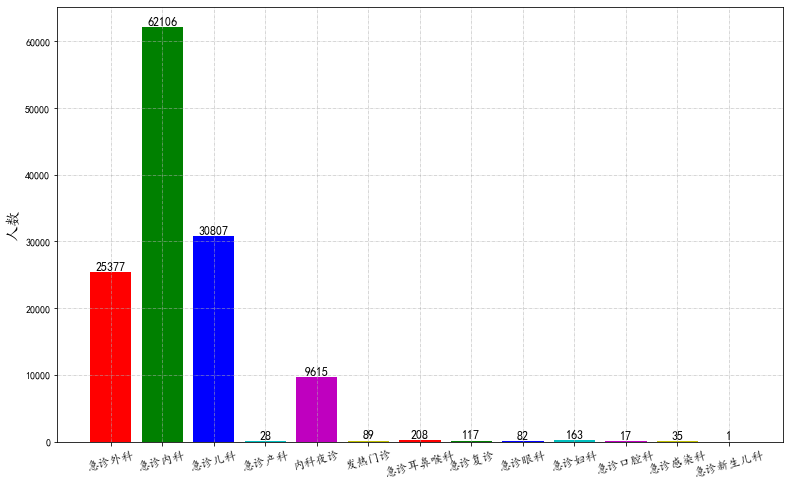

In [20]:
fig = plt.figure(figsize=(13, 8))
plt.bar(labels, fenzhenkeshi,color=['r','g','b', 'c', 'm', 'y'])
for a,b in zip(labels,fenzhenkeshi):
    plt.text(a, b-0.3,'%.0f'%b, ha = 'center',va = 'bottom',fontsize=12)
plt.setp(plt.gca().get_xticklabels(), rotation=15, horizontalalignment='center')#x轴字体旋转23度
plt.xticks(fontsize=12)#设置刻度字体大小
plt.grid(True,axis='both',linestyle='-.', linewidth=0.5)
# plt.xlabel("温度",fontdict={'fontsize': 16})
plt.ylabel("人数",fontdict={'fontsize': 16})
# plt.savefig('')
plt.show()

In [37]:
fenzhendengji=[]
labels=['1','2','3','4']
for i in data['分诊等级'].unique():
    fenzhendengji.append(len(data[data['分诊等级']==int(i)]))
fenzhendengji

[4944, 59370, 64151, 180]

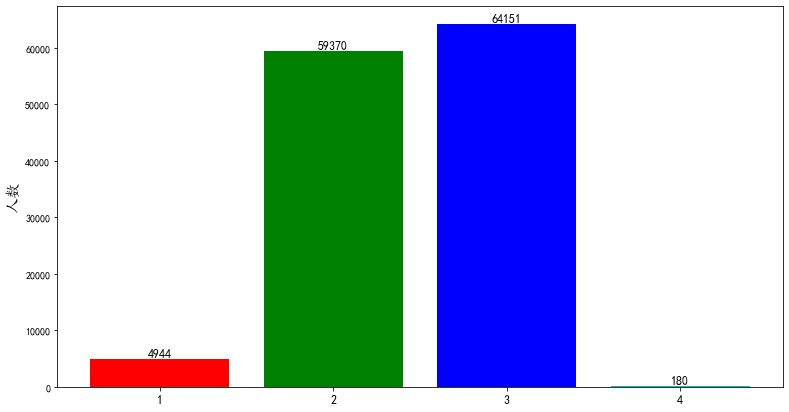

In [41]:
fig = plt.figure(figsize=(13, 7))
plt.bar(labels, fenzhendengji,color=['r','g','b', 'c', 'm', 'y'])
for a,b in zip(labels,fenzhendengji):
    plt.text(a, b-0.3,'%.0f'%b, ha = 'center',va = 'bottom',fontsize=12)
plt.setp(plt.gca().get_xticklabels(), rotation=0, horizontalalignment='center')#x轴字体旋转23度
plt.xticks(fontsize=12)#设置刻度字体大小
# plt.grid(True,axis='both',linestyle='-.', linewidth=0.5)
# plt.xlabel("温度",fontdict={'fontsize': 16})
plt.ylabel("人数",fontdict={'fontsize': 16})
# plt.savefig('')
plt.show()

In [22]:
for i in data['分诊去向'].unique():
    print(i,len(data[data['分诊去向']==i]))

医疗室 125195
抢救室 3450


In [23]:
data[data['分诊去向']=='抢救室']['候诊/分钟'].unique()

array([  12,    5,   45,    0,   34,   66,   37,    3,    8,  105,   61,
          2,  852,   32,   35,   20,  565,   29,    6,    1,  748,   11,
        121,  188,   31,   33,   17,  133,   95,    4,   38,   52,   10,
          9,   25,  362,   16,   70,   23,   81,  569,  617, 1438,    7,
         26,   30,  366,   36,   42,   13, 1080,  446,   21,   62,   18,
         58,   88,   55, 1439,  100,   64,   86,  113,   41,   14,   63,
         93,   49,  150,   43,   60,   15,  162,  409,   19,   39,   54,
         28, 1408,   22,  114,   57,  123,  462,   40,   77,  606,   72,
        288,  197,   51,  208,   27,  317,   24,  102,  568,   53,   69,
        762,  803, 1432,  254,   67,  819,  415,  196, 1434,   68, 1437,
         80,  314,   56, 1166, 1062,  220,   59,   78,  125, 1358,   75,
        461,   44,   84,   47,  168,   50,  108,   85,  101,  179,  147,
       1414,   90,  294,   46,   89,  103,  172,  173,   96,  489,  230,
        135,  403,   79,  428,   83,  198,  341,   

In [24]:
for i in data['体温类型'].unique():
    print(i,len(data[data['体温类型']==i]))

耳温 128638
腋温 7


In [25]:
for i in data['疼痛评分'].unique():
    print('疼痛评分的值{},相同的值人数有：'.format(i),len(data[data['疼痛评分']==i]))

疼痛评分的值43289,相同的值人数有： 199
疼痛评分的值 ,相同的值人数有： 54348
疼痛评分的值43226,相同的值人数有： 3495
疼痛评分的值43102,相同的值人数有： 22175
疼痛评分的值0,相同的值人数有： 39398
疼痛评分的值43163,相同的值人数有： 9026
疼痛评分的值43353,相同的值人数有： 4


In [26]:
data['疼痛评分'].unique()

array([43289, ' ', 43226, 43102, 0, 43163, 43353], dtype=object)

In [27]:
data['GCS评分'].unique()

array([15,  7, 11,  4, 14,  9,  3,  6, 13, 12,  5, 10,  8], dtype=int64)

In [28]:
for i in data['GCS评分'].unique():
    print(i,len(data[data['GCS评分']==i]))

15 128122
7 28
11 45
4 15
14 186
9 31
3 57
6 13
13 33
12 60
5 11
10 34
8 10


In [29]:
list_=data['候诊/分钟'].unique()
list_.sort()
list_

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

In [30]:
data.columns

Index(['就诊时间', '年龄', '性别', '分诊科室', '分诊等级', '分诊去向', '分诊时间', '到诊时间', '抢救上床时间',
       '体温类型', '体温', '脉搏', '收缩压', '舒张压', '呼吸', 'SpO2', '微量血糖', '疼痛评分', 'GCS评分',
       'PHI评分', '来诊主诉', '主诉', '现病史', '既病史', '药物过敏史', '诊断', '处理意见', '注意事项',
       '时长', '没有时长的主诉', '时长（统一数字）_1', '编码', '分诊', '到诊', '时间差', '分诊-年', '分诊-月',
       '分诊-日', '分诊-时', '分诊-分', '分诊-秒', '候诊/分钟'],
      dtype='object')

In [36]:
print(len(data[data['SpO2']>100]))
for i in data[data['SpO2']>100]['SpO2'].unique():
    print('异常值{}  的数量：{}'.format(i,len(data[data['SpO2']==i])))


33
异常值104.0  的数量：1
异常值120.0  的数量：2
异常值1000.0  的数量：3
异常值106.0  的数量：1
异常值121.0  的数量：1
异常值998.0  的数量：2
异常值999.0  的数量：6
异常值131.0  的数量：2
异常值146.0  的数量：1
异常值983.0  的数量：1
异常值993.0  的数量：1
异常值110.0  的数量：1
异常值960.0  的数量：1
异常值112.0  的数量：1
异常值9917.0  的数量：1
异常值107.0  的数量：1
异常值969.0  的数量：1
异常值102.0  的数量：1
异常值113.0  的数量：1
异常值103.0  的数量：1
异常值43351.0  的数量：1
异常值9899.0  的数量：1
异常值114.0  的数量：1


In [65]:
len(data[data['候诊/分钟']>1000])  ##已经等待了16个小时的

179

In [66]:
len(data[data['候诊/分钟']>1400])  ##等待长大于23小时

69

In [87]:
data['分段_15min']=data['候诊/分钟']
fifteen_list=[i for i in range(24*60)]
fifteen_listt_gap=fifteen_list[::15]
for i in range(len(fifteen_listt_gap)):
    data['分段_15min']=data['分段_15min'].apply(lambda x:i+1 if (x>fifteen_listt_gap[i] and x<=fifteen_listt_gap[i]+15) else x)

In [88]:
data.to_excel('源数据/test.xlsx')